In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import sympy as sym

import repeated_play

In [7]:
import itertools

In [8]:
from tqdm.notebook import tqdm

In [9]:
from mpl_toolkits import mplot3d

import matplotlib

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

In [10]:
import warnings

warnings.filterwarnings("ignore")

In [11]:
def default_plot(ax, payoffs=None):
    if payoffs == None:
        R, S, T, P = 3, 0, 5, 1
    else:
        R, S, T, P = payoffs

    # cordinates of corner points
    corner_points_x = [R, S, P, T]
    corner_points_y = [R, T, P, S]

    # lines coordinates
    x1 = [S * (1 - x) + R * x for x in np.linspace(0, 1)]
    y1 = [T * (1 - x) + R * x for x in np.linspace(0, 1)]
    x2 = [S * x + P * (1 - x) for x in np.linspace(0, 1)]
    y2 = [T * x + P * (1 - x) for x in np.linspace(0, 1)]

    # plotting
    ax.scatter(corner_points_x, corner_points_y, color="tab:blue", s=15)

    ax.fill(corner_points_x, corner_points_y, alpha=0.2)

    ax.plot(x1, y1, color="tab:blue")

    ax.plot(y1, x1, color="tab:blue")

    ax.plot(x2, y2, color="tab:blue")

    ax.plot(y2, x2, color="tab:blue")

    ax.set_ylim(S - .5, T + .5)
    ax.set_xlim(S - .5, T + .5)

    return ax

In [12]:
def trnsf_transition_m_memory_one(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0])],
                        [player[1], (1 - player[1])]])
    else:
        M = np.array([[player[0], (1 - player[0])],
                        [player[1], (1 - player[1])]])
    return M

In [13]:
def trnsf_transition_m_memory_two(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    else:
        M = np.array([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    
    
    return M

In [14]:
def trnsf_transition_m_memory_three(player, analytical=True):
    if analytical == False:
        return np.array(
            [
                [player[0], (1 - player[0]), 0, 0, 0, 0, 0, 0],
                [0, 0, player[1], (1 - player[1]), 0, 0, 0, 0],
                [0, 0, 0, 0, player[2], (1 - player[2]), 0, 0],
                [0, 0, 0, 0, 0, 0, player[3], (1 - player[3])],
                [player[4], (1 - player[4]), 0, 0, 0, 0, 0, 0],
                [0, 0, player[5], (1 - player[5]), 0, 0, 0, 0],
                [0, 0, 0, 0, player[6], (1 - player[6]), 0, 0],
                [0, 0, 0, 0, 0, 0, player[7], (1 - player[7])],
            ]
        )

    if analytical == True:
        return sym.Matrix(
            [
                [player[0], (1 - player[0]), 0, 0, 0, 0, 0, 0],
                [0, 0, player[1], (1 - player[1]), 0, 0, 0, 0],
                [0, 0, 0, 0, player[2], (1 - player[2]), 0, 0],
                [0, 0, 0, 0, 0, 0, player[3], (1 - player[3])],
                [player[4], (1 - player[4]), 0, 0, 0, 0, 0, 0],
                [0, 0, player[5], (1 - player[5]), 0, 0, 0, 0],
                [0, 0, 0, 0, player[6], (1 - player[6]), 0, 0],
                [0, 0, 0, 0, 0, 0, player[7], (1 - player[7])],
            ]
        )

In [15]:
def match_payoffs_efficiently(player, coplayer, b, c, memory):
    if memory == "one":
        M = trnsf_transition_m_memory_one(coplayer, analytical=False)
    elif memory == "two":
        M = trnsf_transition_m_memory_two(coplayer, analytical=False)
    elif memory == "three":
        M = trnsf_transition_m_memory_three(coplayer, analytical=False)

    ss = repeated_play.stationary_distribution(M)[0]
    
    if memory == "one":
        rho_q = ss[0]
        
    elif memory == "two":
        
        rho_q = ss[0] + ss[1]
        
    elif memory == "three":
        
        rho_q = ss[0] + ss[1] + ss[4] + ss[5]
        

    rho_p = sum([ss[i] * p for i, p in enumerate(player)])


    payoff_p = (rho_q * b - c * rho_p)
    
    payoff_q = (rho_p * b - c * rho_q)
    
    return payoff_p, payoff_q

In [16]:
def calculate_verts(b, c):
    p = 1 - c / b

    points = [
        (0, 1, p),
        (p, 1, p),
        (1, p, p),
        (1, 0, p),
        (0, 0, p),
    ]

    dpoints = [
        (0, 1, p),
        (0, 1, 0),
        (p, 1, 0),
        (1, p, 0),
        (1, 0, 0),
        (0, 0, 0),
        (0, 0, p),
    ]

    ipoints = [(0, 1, p), (p, 1, p), (1, p, p), (1, p, 0), (p, 1, 0), (0, 1, 0)]

    dline = [(p, 1, p), (p, 1, 0)]

    dline2 = [(1, 0, p), (1, 0, 0)]

    dline3 = [(0, 0, 0), (0, 1, 0)]

    verts = [
        np.array([np.array(point) for point in points]),
        np.array([np.array(point) for point in dpoints]),
        np.array([np.array(point) for point in ipoints]),
        np.array([np.array(point) for point in dline]),
        np.array([np.array(point) for point in dline2]),
        np.array([np.array(point) for point in dline3]),
    ]

    return verts

### Let's check the edge players

In [17]:
bval = 1

cval = 0.5

In [18]:
top = [[1, 0, 0, 1 - cval/bval],
       [1, 0, 1, 1 - cval/bval],
       [1, 1 - cval/bval, 1, 1 - cval/bval], # GTFT
       [1, 1, 1 - cval/bval, 1 - cval/bval], # DGTFT
       [1, 1, 0, 1 - cval/bval]]

In [19]:
bottom = [[1, 0, 0, 0],
          [1, 0, 1, 0],
          [1, 1 - cval/bval, 1, 0],
          [1, 1, 1 - cval/bval, 0],
          [1, 1, 0, 0]]

In [18]:
player = top[3]
 
X1, X2 = [], []

for i in range(10 ** 3):
    
    np.random.seed(i)
    pure_co_player = np.random.random(4)
    
    
    payoffs_p1, payoffs_p2 = match_payoffs_efficiently(player,
                                                       pure_co_player,
                                                       bval,
                                                       cval,
                                                       memory='two')
    
    
    X1.append(payoffs_p1)
    X2.append(payoffs_p2)

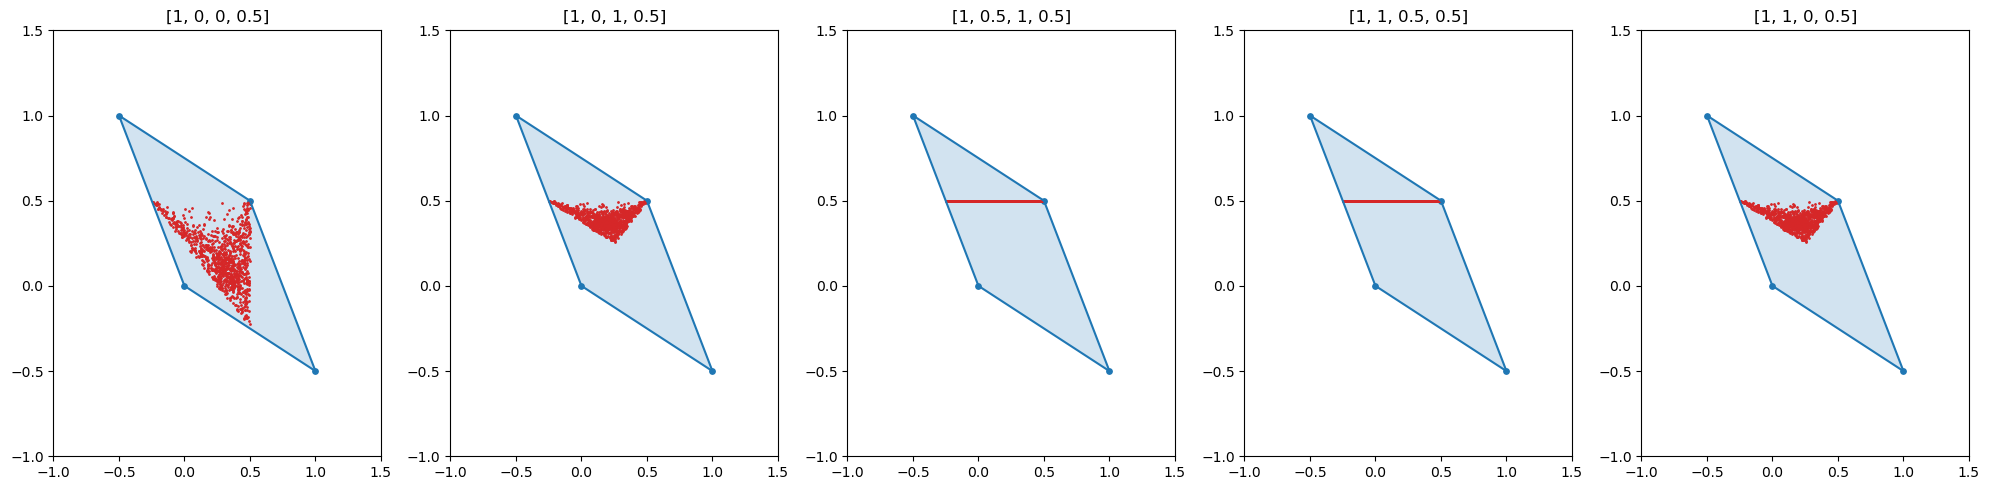

In [19]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))

for i, player in enumerate(top):
 
    X1, X2 = [], []

    for j in range(10 ** 3):

        np.random.seed(j)
        pure_co_player = np.random.random(4)


        payoffs_p1, payoffs_p2 = match_payoffs_efficiently(player,
                                                           pure_co_player,
                                                           bval,
                                                           cval,
                                                           memory='two')


        X1.append(payoffs_p1)
        X2.append(payoffs_p2)
    

    axes[i] = default_plot(axes[i], [bval - cval, -cval, bval, 0])

    axes[i].scatter(X1, X2, s=1, color="tab:red");

    axes[i].set_title(player);
    
fig.tight_layout();

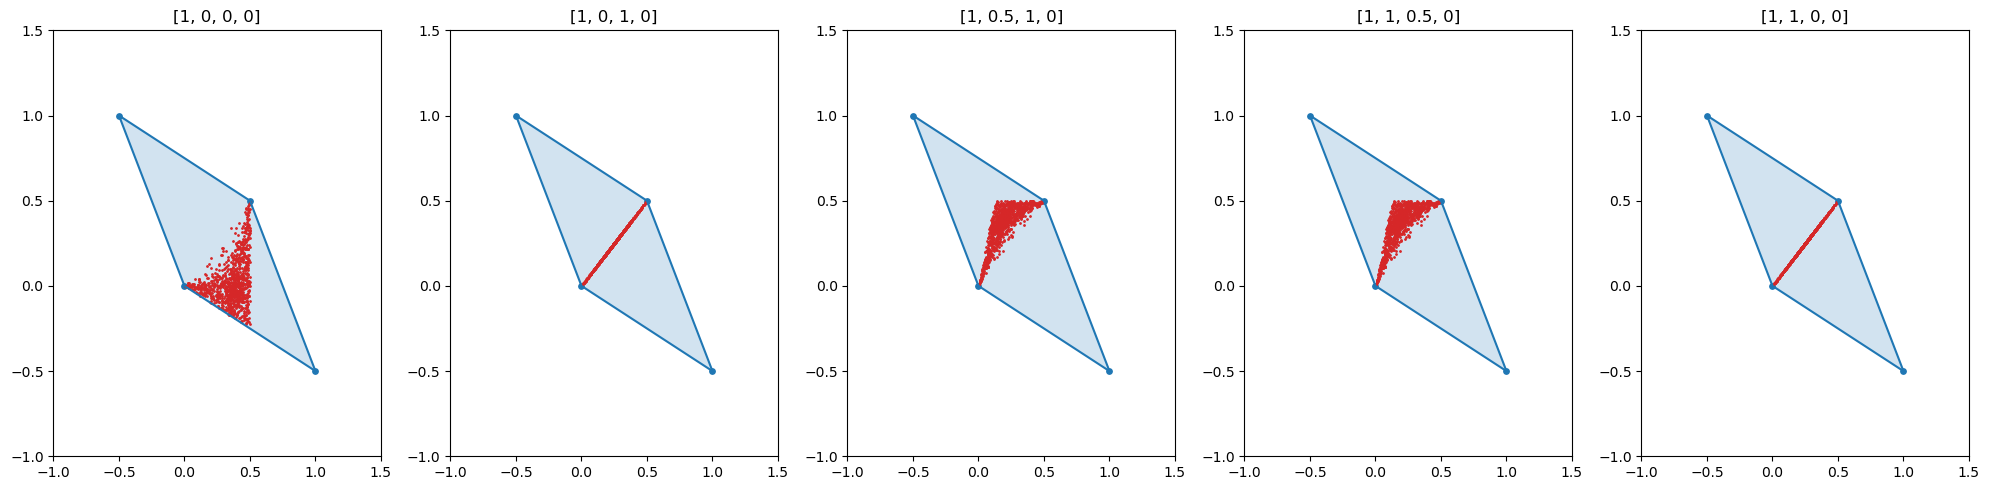

In [20]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))

for i, player in enumerate(bottom):
 
    X1, X2 = [], []

    for j in range(10 ** 3):

        np.random.seed(j)
        pure_co_player = np.random.random(4)


        payoffs_p1, payoffs_p2 = match_payoffs_efficiently(player,
                                                           pure_co_player,
                                                           bval,
                                                           cval,
                                                           memory='two')


        X1.append(payoffs_p1)
        X2.append(payoffs_p2)
    

    axes[i] = default_plot(axes[i], [bval - cval, -cval, bval, 0])

    axes[i].scatter(X1, X2, s=1, color="tab:red");

    axes[i].set_title(player);
    
fig.tight_layout();

### Plot

In [21]:
verts = calculate_verts(1, 0.5)

In [22]:
pdd = np.linspace(0, 1 - 1 / 2, 50)

pdc = np.linspace(0, 1 - (1 / 2) * 1 / 2, 50)

Xpdd, Xpdc = np.meshgrid(pdd, pdc)

pcd = Xpdc

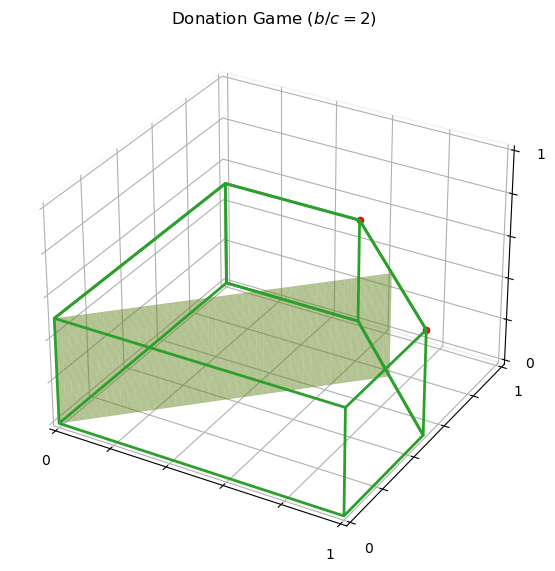

In [23]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121, projection="3d")

axes = [ax1]

ax1.plot_surface(
    pcd,
    Xpdc,
    Xpdd,
    color="yellowgreen",
    alpha=0.5,
    zorder=1,
    label="parametric curve 1",
)

ax1.add_collection3d(
    Poly3DCollection(
        verts, alpha=0.0, linewidths=2, linestyle="-", edgecolors="tab:green"
    )
)

ax1.scatter(top[2][1], top[2][2], top[2][3], color='red')
ax1.scatter(top[3][1], top[3][2], top[3][3], color='red')

for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    ax.set_xticklabels([0, "", "", "", "", 1])
    ax.set_yticklabels([0, "", "", "", "", 1])
    ax.set_zticklabels([0, "", "", "", "", 1])

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False


ax1.set_title("Donation Game ($b/c = 2$)");

### With Errors

In [24]:
epsilon = 10 ** -3

In [25]:
bval = 1

cval = 0.5

In [26]:
top = [[1, 0, 0, 1 - cval/bval],
       [1, 0, 1, 1 - cval/bval],
       [1, 1 - cval/bval, 1, 1 - cval/bval], # GTFT
       [1, 1, 1 - cval/bval, 1 - cval/bval], # DGTFT
       [1, 1, 0, 1 - cval/bval]]

In [27]:
bottom = [[1, 0, 0, 0],
          [1, 0, 1, 0],
          [1, 1 - cval/bval, 1, 0],
          [1, 1, 1 - cval/bval, 0],
          [1, 1, 0, 0]]

[0.999 0.001 0.001 0.5  ]
[0.999 0.001 0.999 0.5  ]
[0.999 0.5   0.999 0.5  ]
[0.999 0.999 0.5   0.5  ]
[0.999 0.999 0.001 0.5  ]


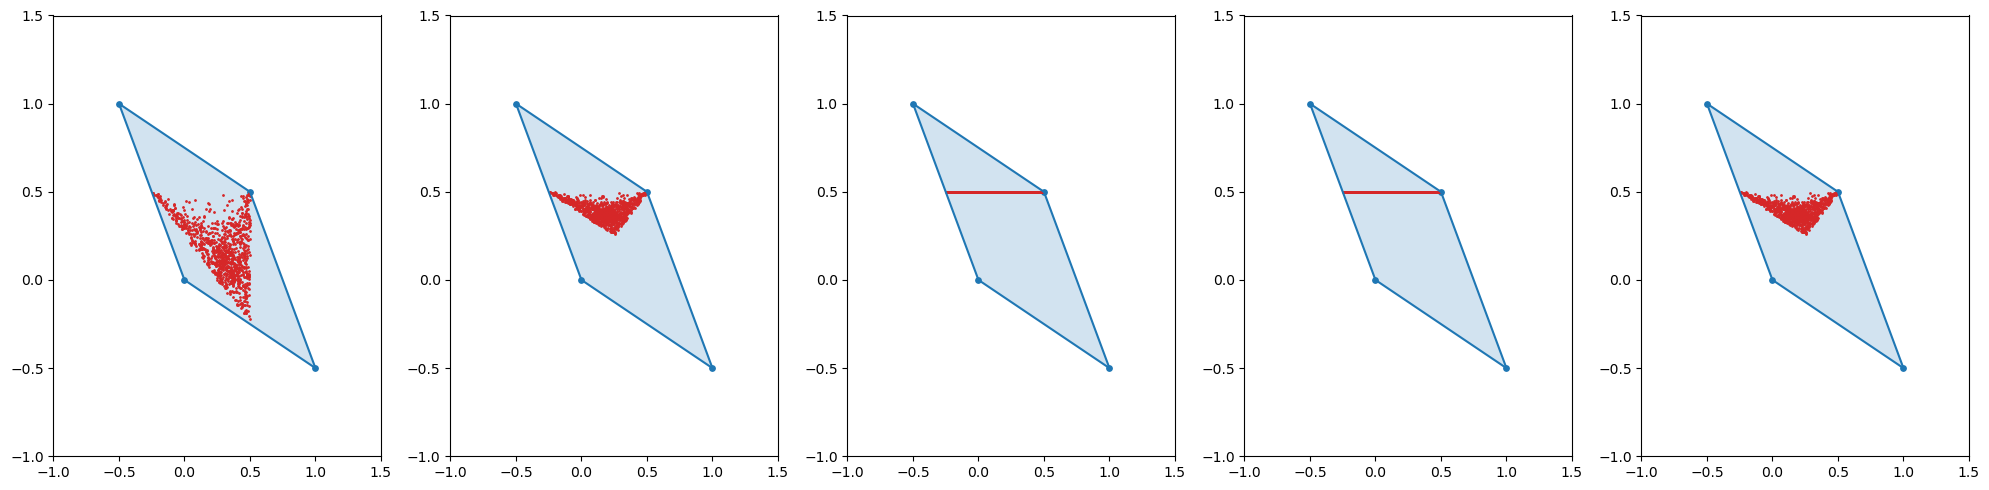

In [28]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))

for i, player in enumerate(top):
    
    player = np.array(player) * (1 - epsilon) + (1 - np.array(player)) * epsilon
    
    print(player)
 
    X1, X2 = [], []

    for j in range(10 ** 3):

        np.random.seed(j)
        pure_co_player = np.random.random(4)
        
        pure_co_player = np.array(pure_co_player) * (1 - epsilon) + (1 - np.array(pure_co_player)) * epsilon


        payoffs_p1, payoffs_p2 = match_payoffs_efficiently(player,
                                                           pure_co_player,
                                                           bval,
                                                           cval,
                                                           memory='two')

        X1.append(payoffs_p1)
        X2.append(payoffs_p2)
    

    axes[i] = default_plot(axes[i], [bval - cval, -cval, bval, 0])

    axes[i].scatter(X1, X2, s=1, color="tab:red");

#     axes[i].set_title(player);
    
fig.tight_layout();

In [34]:
player = top[2]

epsilon = 0.01

player = np.array(player) * (1 - epsilon) + (1 - np.array(player)) * epsilon
    
print(player)
 
X1, X2 = [], []

for j in range(10 ** 3):

    np.random.seed(j)
    pure_co_player = np.random.random(4)

    pure_co_player = np.array(pure_co_player) * (1 - epsilon) + (1 - np.array(pure_co_player)) * epsilon


    payoffs_p1, payoffs_p2 = match_payoffs_efficiently(player,
                                                       pure_co_player,
                                                       bval,
                                                       cval,
                                                       memory='two')

    X1.append(payoffs_p1)
    X2.append(payoffs_p2)

[0.99 0.5  0.99 0.5 ]


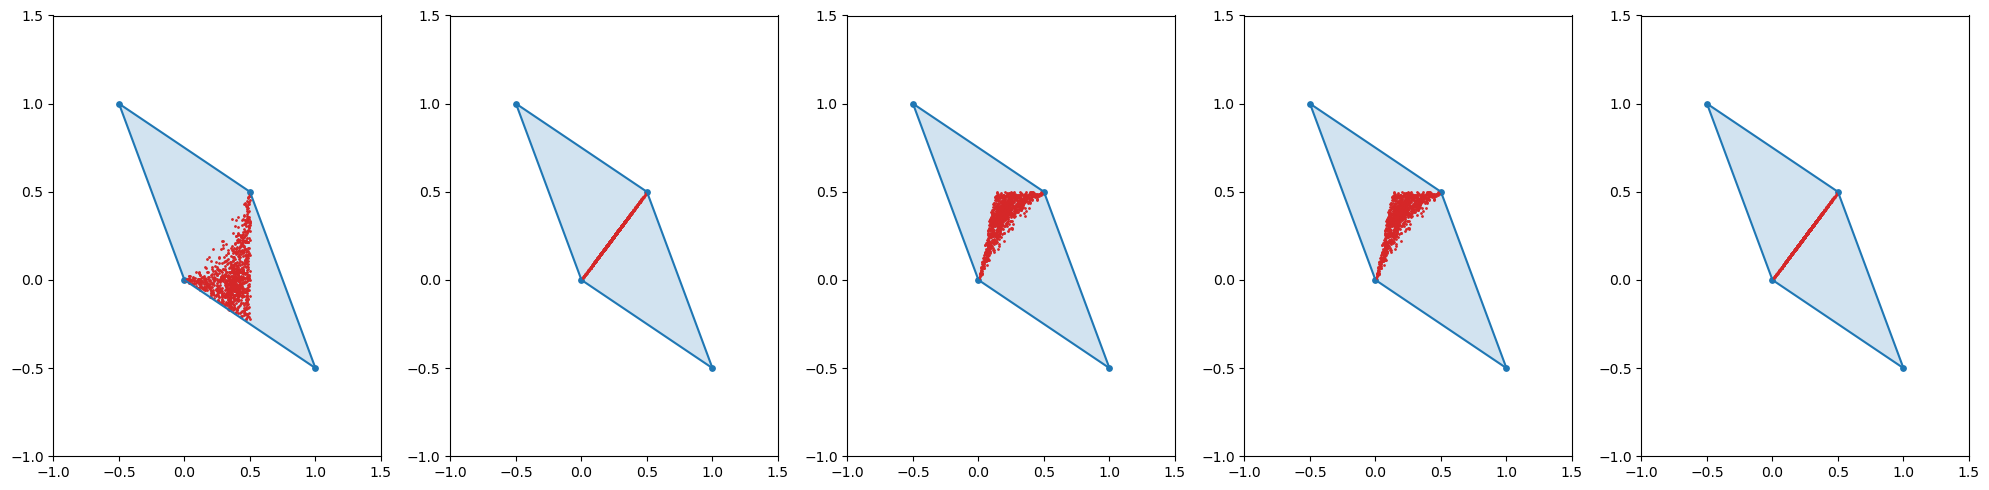

In [127]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))

for i, player in enumerate(bottom):
    
    player = np.array(player) * (1 - epsilon) + (1 - np.array(player)) * epsilon
 
    X1, X2 = [], []

    for j in range(10 ** 3):

        np.random.seed(j)
        pure_co_player = np.random.random(4)
        
        pure_co_player = np.array(pure_co_player) * (1 - epsilon) + (1 - np.array(pure_co_player)) * epsilon


        payoffs_p1, payoffs_p2 = match_payoffs_efficiently(player,
                                                           pure_co_player,
                                                           bval,
                                                           cval,
                                                           memory='two')


        X1.append(payoffs_p1)
        X2.append(payoffs_p2)
    

    axes[i] = default_plot(axes[i], [bval - cval, -cval, bval, 0])

    axes[i].scatter(X1, X2, s=1, color="tab:red");

#     axes[i].set_title(player);
    
fig.tight_layout();

### Linear Combinations

In [143]:
def linear_combination(num, bval, cval):
    A = np.array([1, 1 - cval/bval, 1, 1 - cval/bval])
    B = np.array([1, 1, 1 - cval/bval, 1 - cval/bval])

    combs = np.zeros((num, 4))

    l = np.linspace(0, 1, num)

    for i, point in enumerate(l):
        combs[i] = A * point + B * (1 - point)
        
    return combs

In [154]:
num = 10

combs = linear_combination(num, bval, cval)

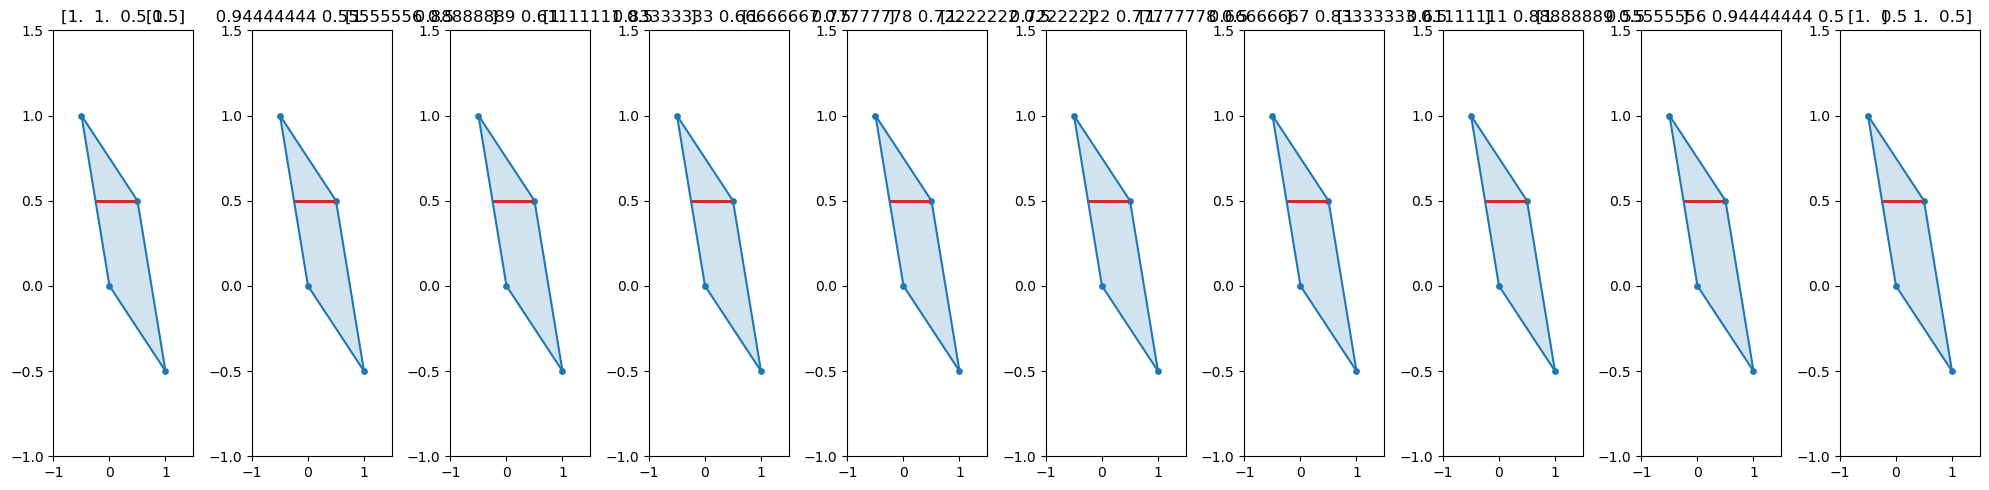

In [155]:
fig, axes = plt.subplots(ncols=num, figsize=(20, 5))

for i, player in enumerate(combs):
 
    X1, X2 = [], []

    for j in range(10 ** 3):

        np.random.seed(j)
        pure_co_player = np.random.random(4)

        payoffs_p1, payoffs_p2 = match_payoffs_efficiently(player,
                                                           pure_co_player,
                                                           bval,
                                                           cval,
                                                           memory='two')


        X1.append(payoffs_p1)
        X2.append(payoffs_p2)
    

    axes[i] = default_plot(axes[i], [bval - cval, -cval, bval, 0])

    axes[i].scatter(X1, X2, s=1, color="tab:red");

    axes[i].set_title(f"{player}");
    
fig.tight_layout();

### Plot

In [36]:
verts = calculate_verts(1, 0.5)

In [37]:
pdd = np.linspace(0, 1 - 1 / 2, 50)

pdc = np.linspace(0, 1 - (1 / 2) * 1 / 2, 50)

Xpdd, Xpdc = np.meshgrid(pdd, pdc)

pcd = Xpdc

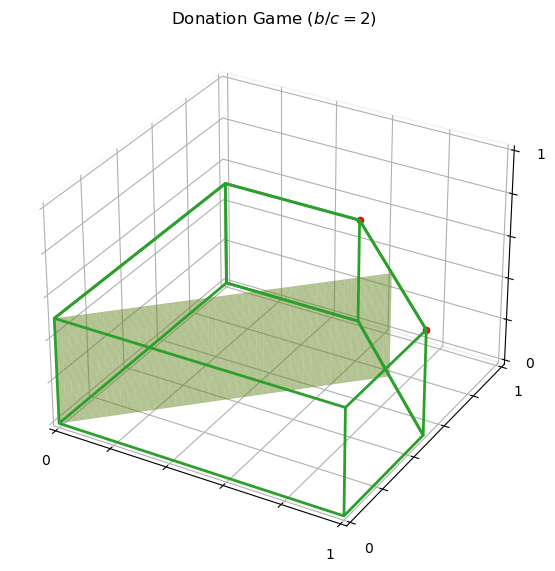

In [38]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121, projection="3d")

axes = [ax1]

ax1.plot_surface(
    pcd,
    Xpdc,
    Xpdd,
    color="yellowgreen",
    alpha=0.5,
    zorder=1,
    label="parametric curve 1",
)

ax1.add_collection3d(
    Poly3DCollection(
        verts, alpha=0.0, linewidths=2, linestyle="-", edgecolors="tab:green"
    )
)

ax1.scatter(top[2][1], top[2][2], top[2][3], color='red')
ax1.scatter(top[3][1], top[3][2], top[3][3], color='red')


for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    ax.set_xticklabels([0, "", "", "", "", 1])
    ax.set_yticklabels([0, "", "", "", "", 1])
    ax.set_zticklabels([0, "", "", "", "", 1])

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False


ax1.set_title("Donation Game ($b/c = 2$)");

### Nash in the case of errors

In [54]:
max_iterations = 10 ** 3

memory = "two"

pure_strategies = list(itertools.product([0, 1], repeat=4))

epsilon = 10 ** -3

In [125]:
nash, notnash = [], []

for i in range(max_iterations):

    np.random.seed(i)

    player = np.random.random(4)

    player[0] = 1
    
    player = np.array(player) * (1 - epsilon) + (1 - np.array(player)) * epsilon

    reactiveplayer = [player[0], player[1], player[0], player[1],
                      player[2], player[3], player[2], player[3]] * 2
    
    checksA = []

    for coplayer in pure_strategies:
        
        coplayer = np.array(coplayer) * (1 - epsilon) + (1 - np.array(coplayer)) * epsilon

        _, payoff_selfreactive = match_payoffs_efficiently(player, coplayer, bval, cval, memory)
        
        M = repeated_play.transition_matrix_repeated_game(reactiveplayer, reactiveplayer, memory='two')
        
        ss = repeated_play.stationary_distribution(M)
        
        payoff_reactive = ss[0] @ np.array([bval - cval, -cval, bval, 0] * 4)

        checkA =  np.isclose(payoff_reactive, payoff_selfreactive, atol=10 ** -3) or payoff_selfreactive < payoff_reactive
        
        # or

        checksA.append(checkA)


    if all(checksA) == True:
        nash.append([i, *player, *checksA, memory])
    else:
        notnash.append([i, *player, *checksA, memory])

In [126]:
len(nash)

90

In [127]:
df = pd.DataFrame(nash)

columns = ['index', 'pcc', 'pcd', 'pdc', 'pdd'] + [f'N{i}' for i in range(1, 17)] + ["memory"]

In [128]:
df.columns = columns

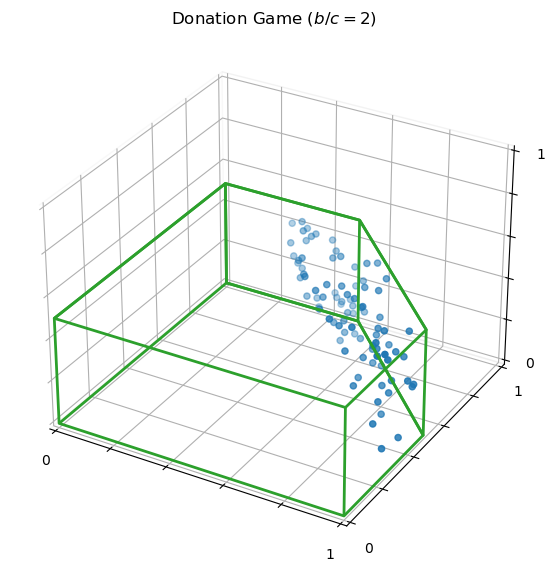

In [130]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121, projection="3d")

axes = [ax1]

ax1.add_collection3d(
    Poly3DCollection(
        verts, alpha=0.0, linewidths=2, linestyle="-", edgecolors="tab:green"
    )
)

ax1.scatter(df['pcd'], df['pdc'], df['pdd'])

for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    ax.set_xticklabels([0, "", "", "", "", 1])
    ax.set_yticklabels([0, "", "", "", "", 1])
    ax.set_zticklabels([0, "", "", "", "", 1])

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False


ax1.set_title("Donation Game ($b/c = 2$)");

### mIs the highest payoff that of ALLC or ALLD?

### Are corner points Nash when there are errors?

In [20]:
top

[[1, 0, 0, 0.5],
 [1, 0, 1, 0.5],
 [1, 0.5, 1, 0.5],
 [1, 1, 0.5, 0.5],
 [1, 1, 0, 0.5]]

In [21]:
bottom

[[1, 0, 0, 0], [1, 0, 1, 0], [1, 0.5, 1, 0], [1, 1, 0.5, 0], [1, 1, 0, 0]]

In [62]:
player

[1, 0, 0, 0.5]

In [63]:
memory = "two"

pure_strategies = list(itertools.product([0, 1], repeat=4))

In [114]:
epsilon = 10 ** - 3

player = top[2]

player = np.array(player) * (1 - epsilon) + (1 - np.array(player)) * epsilon

reactiveplayer = [player[0], player[1], player[0], player[1],
                  player[2], player[3], player[2], player[3]] * 2

In [116]:
top[2]

[1, 0.5, 1, 0.5]

In [115]:
checks = []

for coplayer in pure_strategies:
    
    coplayer = np.array(coplayer) * (1 - epsilon) + (1 - np.array(coplayer)) * epsilon

    _, payoff_selfreactive = match_payoffs_efficiently(player, coplayer, bval, cval, memory)
    
    M = repeated_play.transition_matrix_repeated_game(reactiveplayer, reactiveplayer, memory='two')
    
    ss = repeated_play.stationary_distribution(M)
    
    payoff_reactive = ss[0] @ np.array([bval - cval, -cval, bval, 0] * 4)

    print(len(ss), payoff_selfreactive, payoff_selfreactive < payoff_reactive or np.isclose(payoff_reactive, payoff_selfreactive, atol=10 ** -4))

1 0.499999 False
1 0.4996664442961973 False
1 0.49999800399201594 False
1 0.49949999999999994 False
1 0.49966644429619744 False
1 0.49949999999999994 False
1 0.49950000000000017 False
1 0.49933355570380256 False
1 0.499998003992016 False
1 0.49949999999999967 False
1 0.4995000000000001 False
1 0.49900199600798395 True
1 0.49950000000000006 False
1 0.4993335557038027 False
1 0.499001996007984 True
1 0.499001 True


In [111]:
payoff_reactive

0.4990019960079841

In [76]:
M = repeated_play.transition_matrix_repeated_game(reactiveplayer, reactiveplayer, memory='two')

ss = repeated_play.stationary_distribution(M)

payoff_reactive = ss[1] @ np.array([bval - cval, -cval, bval, 0] * 4)

In [77]:
ss

[array([-0.   ,  0.025,  0.025,  0.05 ,  0.025,  0.05 ,  0.05 ,  0.1  ,
         0.025,  0.05 ,  0.05 ,  0.1  ,  0.05 ,  0.1  ,  0.1  ,  0.2  ]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]